In [54]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [55]:
data = pd.read_csv('2017.csv')
data.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [56]:
del data['Whisker.high']
del data['Whisker.low']
data = data.rename(columns={'Economy..GDP.per.Capita.': 'GDP_Per_Cap', 'Health..Life.Expectancy.': 'Life_Expectancy', \
                            'Trust..Government.Corruption.': 'Trust_Government', 'Happiness.Score': 'Happiness_Score', \
                            'Happiness.Rank': 'Happiness_Rank', 'Dystopia.Residual': 'Dystopia_Residual'})
data.head()

,Country,Happiness_Rank,Happiness_Score,GDP_Per_Cap,Family,Life_Expectancy,Freedom,Generosity,Trust_Government,Dystopia_Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [57]:
data_norm = data.copy(deep=True)
data_norm['GDP_Per_Cap'] = data['GDP_Per_Cap'] / data['Happiness_Score']
data_norm['Family'] = data['Family'] / data['Happiness_Score']
data_norm['Life_Expectancy'] = data['Life_Expectancy'] / data['Happiness_Score']
data_norm['Freedom'] = data['Freedom'] / data['Happiness_Score']
data_norm['Generosity'] = data['Generosity'] / data['Happiness_Score']
data_norm['Trust_Government'] = data['Trust_Government'] / data['Happiness_Score']
data_norm['Dystopia_Residual'] = data['Dystopia_Residual'] / data['Happiness_Score']
data_norm.head()

,Country,Happiness_Rank,Happiness_Score,GDP_Per_Cap,Family,Life_Expectancy,Freedom,Generosity,Trust_Government,Dystopia_Residual
0,Norway,1,7.537,0.214470,0.203466,0.105701,0.084307,0.048031,0.041922,0.302113
1,Denmark,2,7.522,0.197073,0.206211,0.105366,0.083223,0.047232,0.053280,0.307592
2,Iceland,3,7.504,0.197312,0.214629,0.111081,0.083577,0.063372,0.020459,0.309530
3,Switzerland,4,7.494,0.208831,0.202417,0.114509,0.082742,0.038771,0.048973,0.303805
4,Finland,5,7.469,0.193275,0.206219,0.108335,0.082735,0.032867,0.051227,0.325369


In [58]:
data2015 = pd.read_csv('2016.csv')
regions = data2015[['Country', 'Region']]
data = data.set_index('Country').join(regions.set_index('Country'), rsuffix='2015', lsuffix='')
data

,Happiness_Rank,Happiness_Score,GDP_Per_Cap,Family,Life_Expectancy,Freedom,Generosity,Trust_Government,Dystopia_Residual,Region
Country,,,,,,,,,,
Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Western Europe
Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Western Europe
Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Western Europe
Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Western Europe
Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Western Europe
Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,Western Europe
Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,North America
New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,Australia and New Zealand
Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,Western Europe


In [59]:
data = data[pd.isnull(data['Region']) == False]
data.head()

,Happiness_Rank,Happiness_Score,GDP_Per_Cap,Family,Life_Expectancy,Freedom,Generosity,Trust_Government,Dystopia_Residual,Region
Country,,,,,,,,,,
Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Western Europe
Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Western Europe
Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Western Europe
Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Western Europe
Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Western Europe


In [60]:
data.sort_values(by='Family', ascending=False).head(5)

,Happiness_Rank,Happiness_Score,GDP_Per_Cap,Family,Life_Expectancy,Freedom,Generosity,Trust_Government,Dystopia_Residual,Region
Country,,,,,,,,,,
Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Western Europe
Ireland,15,6.977,1.535707,1.558231,0.809783,0.573110,0.427858,0.298388,1.773869,Western Europe
Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Western Europe
Uzbekistan,47,5.971,0.786441,1.548969,0.498273,0.658249,0.415984,0.246528,1.816914,Central and Eastern Europe
New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,Australia and New Zealand


In [76]:
def getScatterPlotByColumn(colname):
    fig, ax = plt.subplots()
    ax.scatter(data_norm[colname], data_norm['Happiness_Score'])
    # generate scatterplot between population (x) and dropouts (y)
    m, y = np.polyfit(data_norm[colname], data_norm['Happiness_Score'], 1)
    plt.plot(data_norm[colname], m * data_norm[colname] + y, '-',color="magenta")
    plt.title('Happiness Ranking vs {} for Each Country'.format(colname))
    plt.xlabel(colname)
    plt.ylabel('Happiness Ranking')
    plt.show()
    slope, intercept, r_value, p_value, std_err = stats.linregress(data_norm[colname], data_norm['Happiness_Score'])
    print('r^2 value for correlation between {} and Happiness: {}'.format(colname, r_value**2))

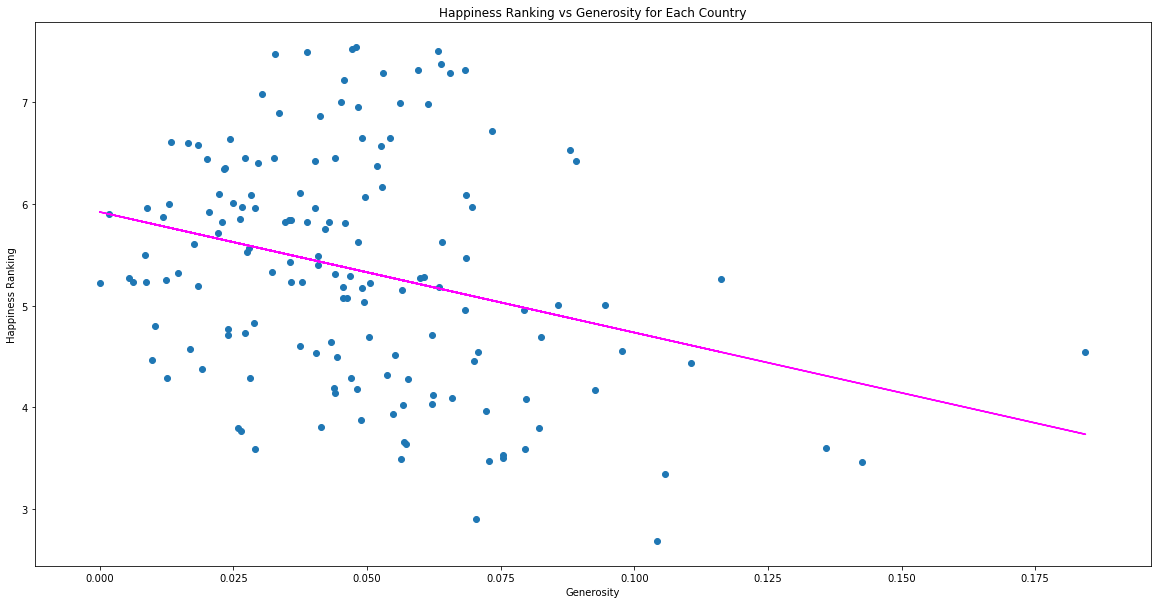

r^2 value for correlation between Generosity and Happiness: 0.086770725211968


In [77]:
getScatterPlotByColumn('Generosity')

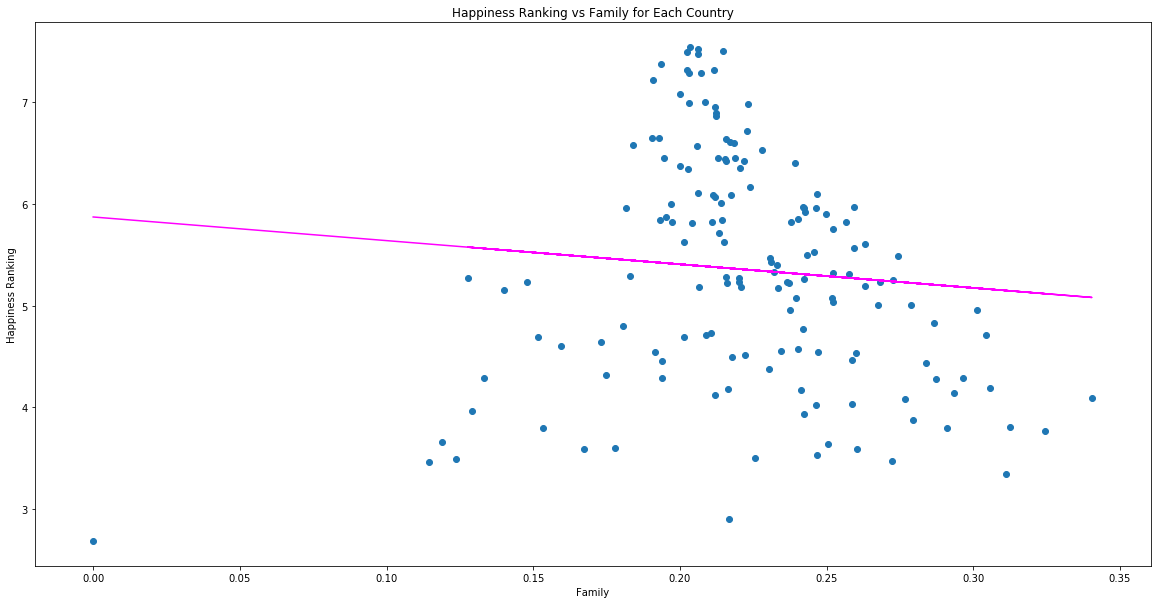

r^2 value for correlation between Family and Happiness: 0.008344621302033343


In [78]:
getScatterPlotByColumn('Family')

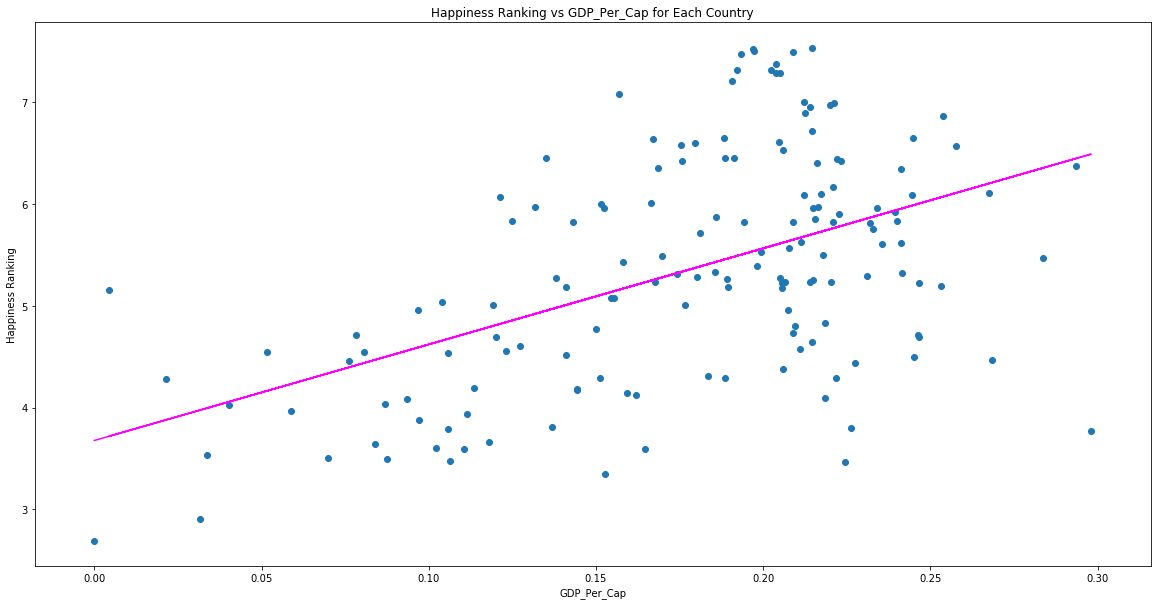

r^2 value for correlation between GDP_Per_Cap and Happiness: 0.2482102510534517


In [79]:
getScatterPlotByColumn('GDP_Per_Cap')

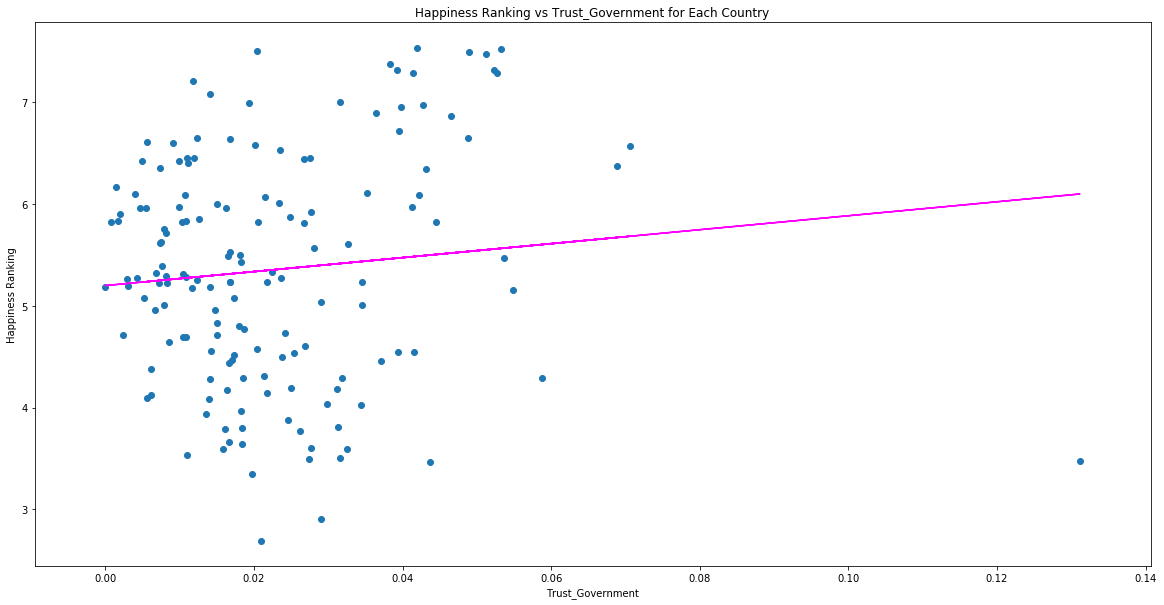

r^2 value for correlation between Trust_Government and Happiness: 0.010819619763668206


In [80]:
getScatterPlotByColumn('Trust_Government')

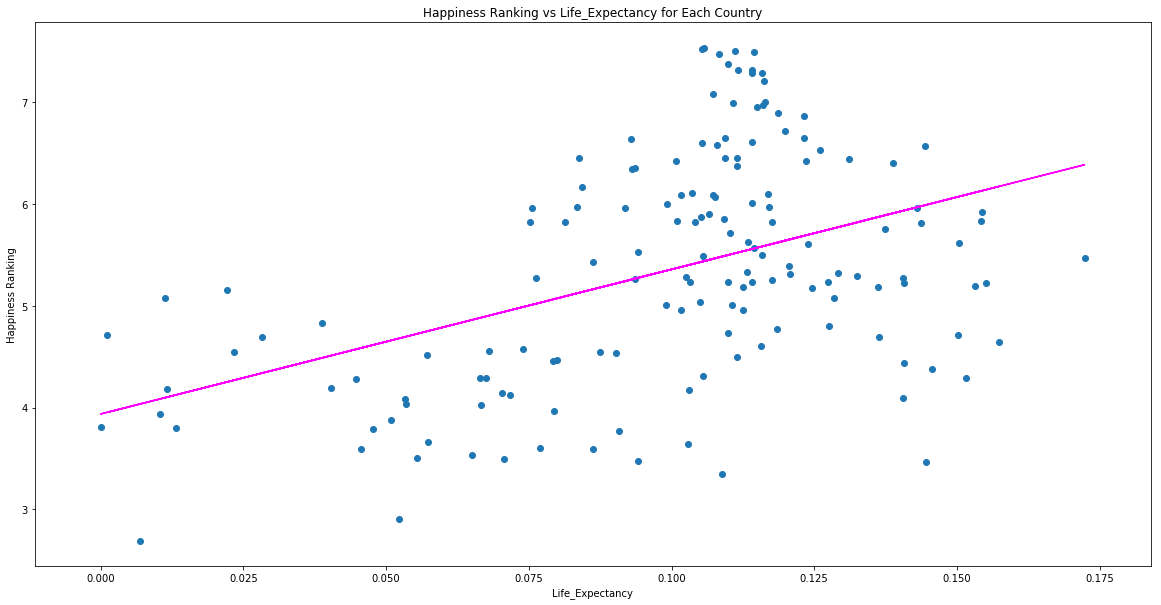

r^2 value for correlation between Life_Expectancy and Happiness: 0.1943698140069314


In [81]:
getScatterPlotByColumn('Life_Expectancy')

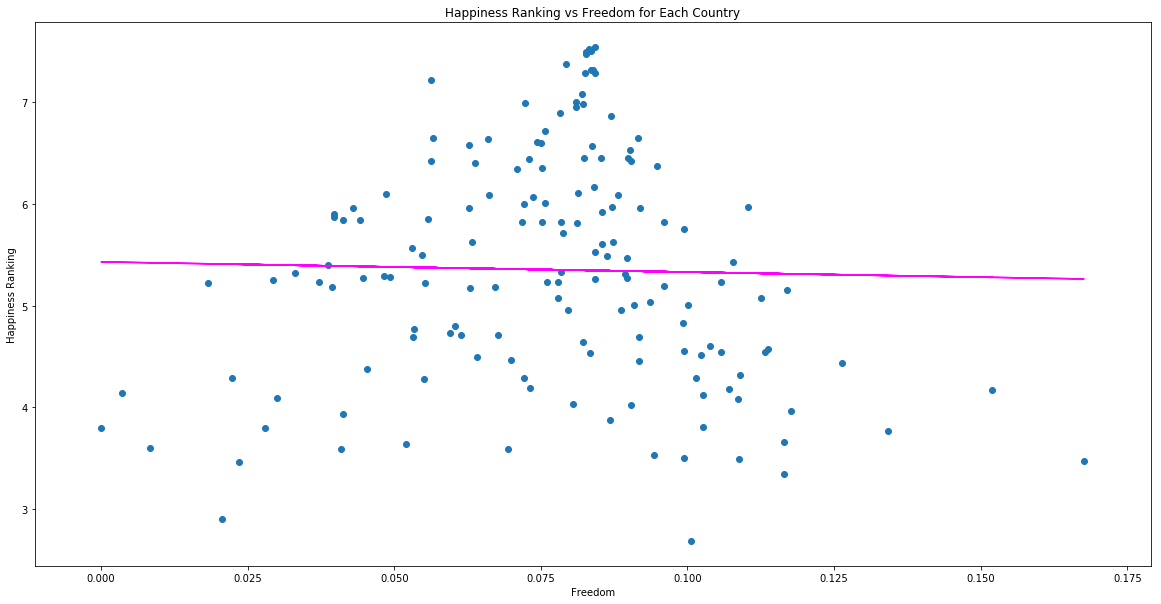

r^2 value for correlation between Freedom and Happiness: 0.0005701615561120827


In [82]:
getScatterPlotByColumn('Freedom')